$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/matan.ophir/.cache/torch/hub/ultralytics_yolov5_master


YOLOv5 🚀 2024-12-30 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)



Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


image 1/2: 183x275 2 persons, 1 surfboard
image 2/2: 750x750 2 cats, 1 dog
Speed: 121.1ms pre-process, 51.7ms inference, 78.9ms NMS per image at shape (2, 3, 640, 640)


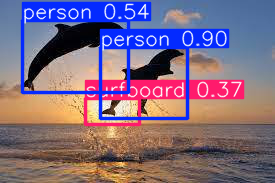

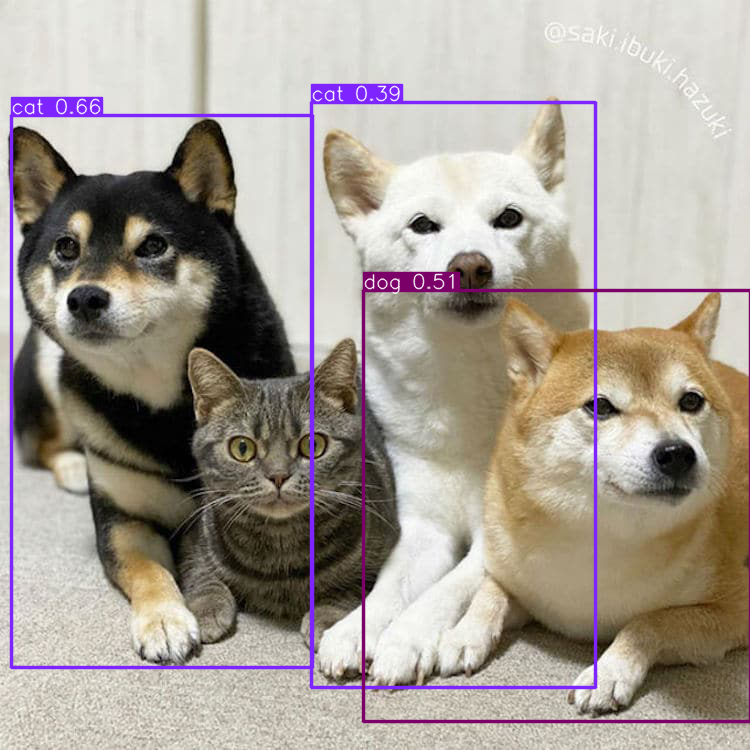

In [2]:
#Insert the inference code here.
with torch.no_grad():
    imgs = ['imgs/DolphinsInTheSky.jpg','imgs/cat-shiba-inu-2.jpg']
    results = model(imgs)
    results.print()
    results.show()
    


In [3]:
from cs236781.answers import display_answer
import hw2.answers

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [4]:
display_answer(hw2.answers.part6_q1)



**Your answer:**
1. The model did a pretty bad job at detecting the objects.\
the bounding boxes did manage to bound objects but the class prediction was very poor and the confidence is low accordingly.\

2. in the first image of dolphins one possible cause is training dataset bias:\
- the model was mostly shown during the training process surfer in the ocean and therefore without distinct features of something else, it will classify an object in that scenery as a surfer.\
- the image is missing its texture and maybe it something the model didn't see before.\
in the dog image there could be a problem with how the model assigns bounding box and the following classification.\
if the model doesn't intersect the image good enough and left to process big bounding boxes that may contain more than on class, then it might confuse the model as we see here.\

3. yolo is trained end to end on a single neural network so we can do what we have seen in tutorial 4 PGD attack.\
    by taking an image and maximize its loss where the input parameter (which we are optimizing) is a delta from the original image.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

image 1/5: 425x612 1 cow
image 2/5: 371x335 1 bird, 1 dog
image 3/5: 372x366 1 dining table
image 4/5: 486x369 (no detections)
image 5/5: 371x382 1 person
Speed: 23.3ms pre-process, 8.7ms inference, 1.2ms NMS per image at shape (5, 3, 640, 640)


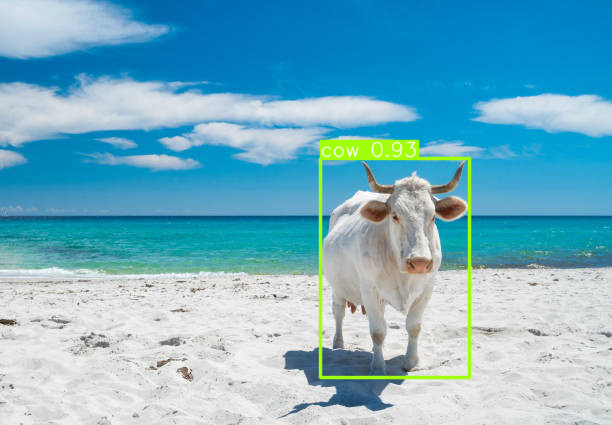

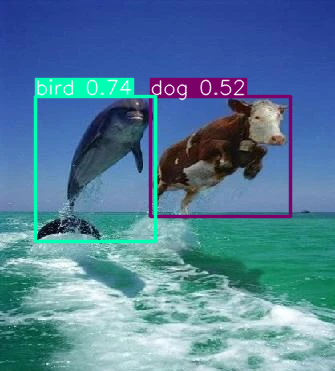

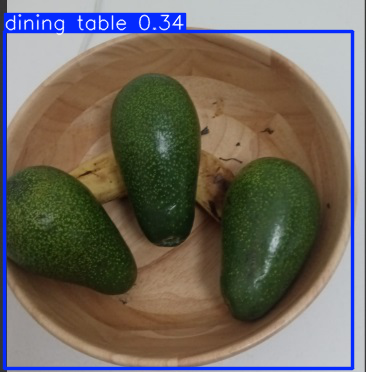

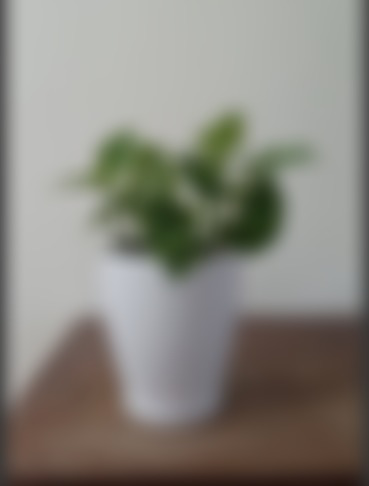

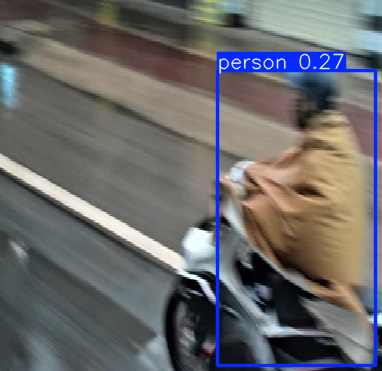

In [5]:
#Insert the inference code here.
with torch.no_grad():
    imgs = ['imgs/cow_in_ocean.jpg','imgs/ocean_cow.jpg','imgs/hidden.jpg','imgs/blurred_plant.jpg','imgs/deformed.jpg']
    results = model(imgs)
    results.print()
    results.show() 


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [6]:
display_answer(hw2.answers.part6_q3)



**Your answer:**
actually the model did pretty good when given reasonable tasks (see cow on the beach or moving man).\
when given more difficult tasks such as an almost completely hidden banana or a blurred plant it didn't succeed in classifying then.
We can assume the following pitfalls caused the mistakes:\
model bias + deformation - ocean-cow\
occlusion - hidden_banana\
blurring - blurred_plant.



## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

image 1/1: 486x369 1 potted plant, 1 vase
Speed: 18.8ms pre-process, 25.1ms inference, 1.6ms NMS per image at shape (1, 3, 640, 512)


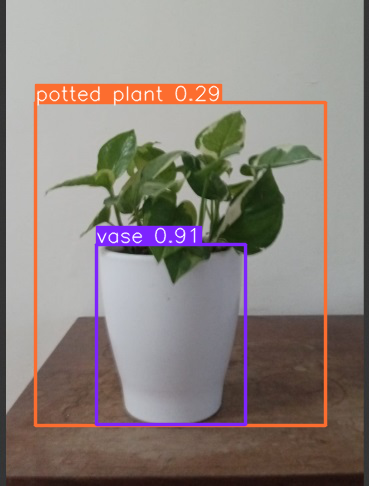

In [7]:
#insert bonus code here}
with torch.no_grad():
    imgs = ['imgs/plant_fix.jpg']
    results = model(imgs)
    results.print()
    results.show() 


In [8]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**
Tried fixing the other photos but failed. we've resharpen the image,
